<a href="https://colab.research.google.com/github/moharamfatema/heartbeat-sounds/blob/main/heartbeatsounds_regress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Exploratory Analysis**

In [4]:
import pandas as pd
import librosa as lr
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
acsv = 'drive/MyDrive/PR_assignment3/set_a.csv'
bcsv = 'drive/MyDrive/PR_assignment3/set_b.csv'
a_timingcsv = 'drive/MyDrive/PR_assignment3/set_a_timing.csv'

In [7]:
setA = pd.read_csv(acsv)
setB = pd.read_csv(bcsv)
setAtiming = pd.read_csv(a_timingcsv)

Understanding the data

In [ ]:
print(setA.head(-1))

    dataset                             fname     label  sublabel
0         a  set_a/artifact__201012172012.wav  artifact       NaN
1         a  set_a/artifact__201105040918.wav  artifact       NaN
2         a  set_a/artifact__201105041959.wav  artifact       NaN
3         a  set_a/artifact__201105051017.wav  artifact       NaN
4         a  set_a/artifact__201105060108.wav  artifact       NaN
..      ...                               ...       ...       ...
170       a          set_a/__201108222234.wav       NaN       NaN
171       a          set_a/__201108222241.wav       NaN       NaN
172       a          set_a/__201108222244.wav       NaN       NaN
173       a          set_a/__201108222247.wav       NaN       NaN
174       a          set_a/__201108222254.wav       NaN       NaN

[175 rows x 4 columns]


In [ ]:
print(setB.head(-1))

    dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            NaN  
1            NaN  
2     

In [ ]:
print(setAtiming.head(-1))

                              fname  cycle sound  location
0    set_a/normal__201102081321.wav      1    S1     10021
1    set_a/normal__201102081321.wav      1    S2     20759
2    set_a/normal__201102081321.wav      2    S1     35075
3    set_a/normal__201102081321.wav      2    S2     47244
4    set_a/normal__201102081321.wav      3    S1     62992
..                              ...    ...   ...       ...
384  set_a/normal__201108011118.wav     10    S1    272527
385  set_a/normal__201108011118.wav     10    S2    284673
386  set_a/normal__201108011118.wav     11    S1    300863
387  set_a/normal__201108011118.wav     11    S2    314279
388  set_a/normal__201108011118.wav     12    S1    330980

[389 rows x 4 columns]


In [5]:
setA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dataset   176 non-null    object 
 1   fname     176 non-null    object 
 2   label     124 non-null    object 
 3   sublabel  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


In [6]:
setB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dataset   656 non-null    object
 1   fname     656 non-null    object
 2   label     461 non-null    object
 3   sublabel  149 non-null    object
dtypes: object(4)
memory usage: 20.6+ KB


In [7]:
setAtiming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     390 non-null    object
 1   cycle     390 non-null    int64 
 2   sound     390 non-null    object
 3   location  390 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.3+ KB


In [8]:
setB.describe()

dataset                                              fname   label  \
count      656                                                656     461   
unique       1                                                656       3   
top          b  set_b/Btraining_extrastole_127_1306764300147_C...  normal   
freq       656                                                  1     320   

           sublabel  
count           149  
unique            2  
top     noisynormal  
freq            120

In [12]:
setAtiming.describe()

cycle       location
count  390.000000     390.000000
mean     5.733333  164639.984615
std      3.732807   99310.875752
min      1.000000    2583.000000
25%      3.000000   82313.000000
50%      5.000000  155624.500000
75%      8.000000  239709.750000
max     19.000000  390873.000000

In [ ]:
print(setA["label"].value_counts())

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [ ]:
print(setA["label"].value_counts().sum())

124


In [ ]:
print(setA["label"].isnull().sum())

52


In [ ]:
# check to see if they are the same amount
print(setAtiming['sound'].value_counts())

S1    195
S2    195
Name: sound, dtype: int64


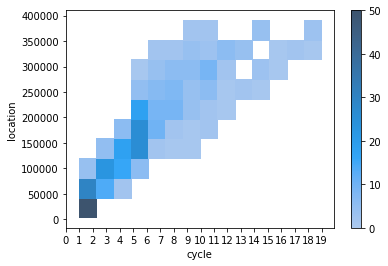

In [8]:
g= sns.histplot(data=setAtiming, x="cycle", y="location", cbar=True)
g.set_xticks(range(20))

Editing the data

In [9]:
# we will drop the entries with artifact as label since it is not one of the needed classifications
setA = setA[setA.label != 'artifact']

In [10]:
# we will drop the entries with null as the label
setA = setA.dropna(subset=['label'])
setA.head(-1)

dataset                             fname     label  sublabel
40        a  set_a/extrahls__201101070953.wav  extrahls       NaN
41        a  set_a/extrahls__201101091153.wav  extrahls       NaN
42        a  set_a/extrahls__201101152255.wav  extrahls       NaN
43        a  set_a/extrahls__201101160804.wav  extrahls       NaN
44        a  set_a/extrahls__201101160808.wav  extrahls       NaN
..      ...                               ...       ...       ...
118       a    set_a/normal__201106221418.wav    normal       NaN
119       a    set_a/normal__201106221450.wav    normal       NaN
120       a    set_a/normal__201108011112.wav    normal       NaN
121       a    set_a/normal__201108011114.wav    normal       NaN
122       a    set_a/normal__201108011115.wav    normal       NaN

[83 rows x 4 columns]

In [11]:
print(setA["label"].value_counts())
# now set A has 3 classifications

murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [12]:
# we will drop the entries with null as the label
setB = setB.dropna(subset=['label'])
setB.head(-1)

dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
650  noisynormal  
651  noisynormal  
652  noisynormal  
653  noisynormal  
654  noisynormal  

[460 rows x 4 columns]

In [13]:
print(setB["label"].value_counts())
# set B has 3 classifications

normal        320
murmur         95
extrastole     46
Name: label, dtype: int64


In [14]:
# will need all 4 categories together to be able to classify, so will join both sets A and B
setAB = [setA,setB]
ABdf = pd.concat(setAB)
print(ABdf.head(-1))

    dataset                                              fname     label  \
40        a                   set_a/extrahls__201101070953.wav  extrahls   
41        a                   set_a/extrahls__201101091153.wav  extrahls   
42        a                   set_a/extrahls__201101152255.wav  extrahls   
43        a                   set_a/extrahls__201101160804.wav  extrahls   
44        a                   set_a/extrahls__201101160808.wav  extrahls   
..      ...                                                ...       ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
40           NaN  
41           NaN  
42           NaN  
43         

In [15]:
print(ABdf["label"].value_counts())

normal        351
murmur        129
extrastole     46
extrahls       19
Name: label, dtype: int64


Distribution of each class

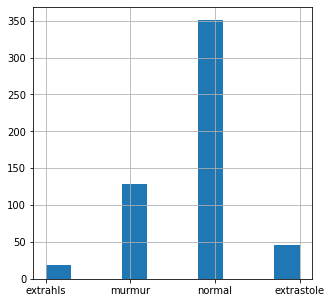

In [16]:
ABdf['label'].hist(figsize=(5, 5))

The data is very unbalanced, so we will upsample extrahls and extrastole and downsample normal

In [17]:
df_murmur = ABdf[ABdf.label == 'murmur']
df_extrastole = ABdf[ABdf.label == 'extrastole']
df_extrahls = ABdf[ABdf.label == 'extrahls']
df_normal = ABdf[ABdf.label == 'normal']
 
# Upsample minority classes
df_exhals_upsampled = resample(df_extrahls, replace=True, n_samples=129)    # to match murmur class
df_extrastole_upsampled = resample(df_extrastole, replace=True, n_samples=129)
# Downsample majority class
df_normal_downsampled = resample(df_normal, replace=False, n_samples=129)                               

# Combine classes
df_upsampled = pd.concat([df_murmur, df_exhals_upsampled])
df_upsampled = pd.concat([df_upsampled, df_extrastole_upsampled])
ABdf = pd.concat([df_upsampled, df_normal_downsampled])

ABdf.label.value_counts()

murmur        129
extrahls      129
extrastole    129
normal        129
Name: label, dtype: int64

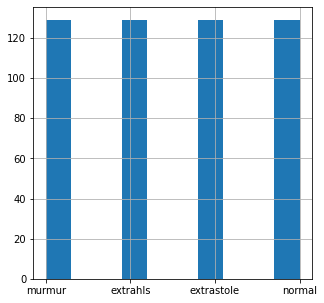

In [18]:
ABdf['label'].hist(figsize=(5, 5))

In [19]:
ABdf.head(-1)

dataset                                            fname   label sublabel
59        a                   set_a/murmur__201101051104.wav  murmur      NaN
60        a                   set_a/murmur__201101051108.wav  murmur      NaN
61        a                   set_a/murmur__201101051114.wav  murmur      NaN
62        a                   set_a/murmur__201101180902.wav  murmur      NaN
63        a                   set_a/murmur__201102051443.wav  murmur      NaN
..      ...                                              ...     ...      ...
234       b  set_b/Btraining_normal_194_1308139824187_A1.wav  normal      NaN
121       a                   set_a/normal__201108011114.wav  normal      NaN
203       b  set_b/Btraining_normal_174_1307987737137_B1.wav  normal      NaN
184       b  set_b/Btraining_normal_155_1306935902813_B1.wav  normal      NaN
205       b  set_b/Btraining_normal_175_1307987962616_B1.wav  normal      NaN

[515 rows x 4 columns]

In [20]:
ABdf = ABdf.reset_index()
print(ABdf.head(-1))

     index dataset                                            fname   label  \
0       59       a                   set_a/murmur__201101051104.wav  murmur   
1       60       a                   set_a/murmur__201101051108.wav  murmur   
2       61       a                   set_a/murmur__201101051114.wav  murmur   
3       62       a                   set_a/murmur__201101180902.wav  murmur   
4       63       a                   set_a/murmur__201102051443.wav  murmur   
..     ...     ...                                              ...     ...   
510    234       b  set_b/Btraining_normal_194_1308139824187_A1.wav  normal   
511    121       a                   set_a/normal__201108011114.wav  normal   
512    203       b  set_b/Btraining_normal_174_1307987737137_B1.wav  normal   
513    184       b  set_b/Btraining_normal_155_1306935902813_B1.wav  normal   
514    205       b  set_b/Btraining_normal_175_1307987962616_B1.wav  normal   

    sublabel  
0        NaN  
1        NaN  
2     

Looking at the audio signals of each class

In [21]:
# making a new dataframe with just the audio and its label
audioList = []
labels = []
dir = 'drive/MyDrive/PR_assignment3/'
for j in range(516):
  if('Btraining_extrastole' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_extrastole', 'extrastole_')
    #print(alteredPathName)
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_normal_Btraining_' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_normal_Btraining_', 'normal_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_normal' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_normal', 'normal_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_murmur_Btraining_' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_murmur_Btraining_', 'murmur_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_murmur' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_murmur', 'murmur_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  else:
    audioList.append(dir + str(ABdf["fname"][j]))
    labels.append(ABdf["label"][j])

In [22]:
print(audioList)
print(len(audioList))
print(len(labels))

['drive/MyDrive/PR_assignment3/set_a/murmur__201101051104.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201101051108.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201101051114.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201101180902.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201102051443.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201102052338.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201103291548.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201104021355.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201104241315.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201104291843.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201106141148.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201108222221.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201108222223.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201108222224.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201108222226.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__2011082222

In [23]:
audioListSeries = pd.Series(audioList,name="Audio")
labelsSeries = pd.Series(labels,name="Label")
audioDF = pd.concat([audioListSeries,labelsSeries],axis=1)

In [24]:
audioDF['Label'].value_counts()

murmur        129
extrahls      129
extrastole    129
normal        129
Name: Label, dtype: int64

In [17]:
audioDF.head(-1)

Audio   Label
0    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
1    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
2    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
3    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
4    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
..                                                 ...     ...
510  drive/MyDrive/PR_assignment3/set_a/normal__201...  normal
511  drive/MyDrive/PR_assignment3/set_b/normal_nois...  normal
512  drive/MyDrive/PR_assignment3/set_b/normal__181...  normal
513  drive/MyDrive/PR_assignment3/set_b/normal__152...  normal
514  drive/MyDrive/PR_assignment3/set_b/normal_nois...  normal

[515 rows x 2 columns]

drive/MyDrive/PR_assignment3/set_a/extrahls__201103150114.wav
129


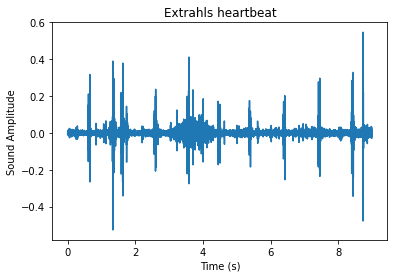

In [25]:
i = 0
while('extrahls' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i])
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrahls heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [26]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 9.0
(198450,) 22050


drive/MyDrive/PR_assignment3/set_a/murmur__201101051104.wav
0


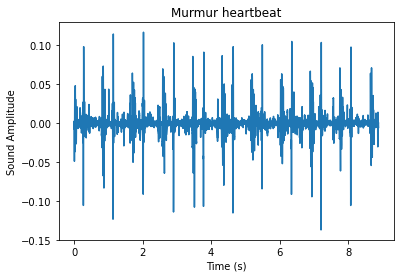

In [27]:
i = 0
while('murmur' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i])
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Murmur heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)
#print(audio,audio_sfreq)

In [28]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 8.88408163265306
(195894,) 22050


drive/MyDrive/PR_assignment3/set_b/normal_noisynormal_108_1305654420093_B.wav
387


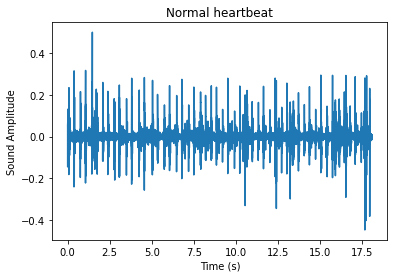

In [29]:
i = 0
while('normal' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i])
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Normal heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [30]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 18.096281179138323
(399023,) 22050


drive/MyDrive/PR_assignment3/set_b/extrastole__134_1306428161797_C1.wav
258


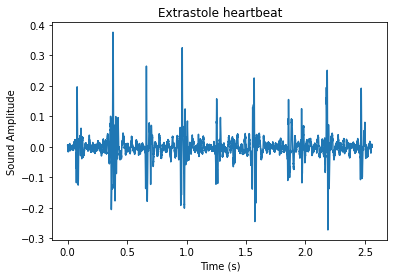

In [31]:
i = 0
while('extrastole' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i])
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrastole heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [32]:
# function to stretch the time of the signal
def stretch_function(data,rate=0.5):
    return lr.effects.time_stretch(data,rate)

In [33]:
word = ABdf['fname'][258].replace('Btraining_extrastole', 'extrastole_')
wav_type,sample_rate = lr.load(dir + word)
stretch_audio = stretch_function(wav_type)
Audio(stretch_audio,rate=sample_rate)

In [34]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# Pad audios to make them all the same length
from pydub import AudioSegment

pad_ms = 10000  # Add here the fix length you want (in milliseconds)
audio10 = AudioSegment.from_wav('drive/MyDrive/PR_assignment3/set_b/extrastole__275_1310990852160_B.wav')
#assert pad_ms > len(audio10), "Audio was longer that 1 second. Path: " + str(full_path)
silence = AudioSegment.silent(duration=pad_ms-len(audio10)+1)


padded = audio10 + silence  # Adding silence after the audio


In [36]:
padded=padded.export('padded-file.wav', format='wav')
audio10, audio_sfreq = lr.load(padded)
Audio(audio10,rate=audio_sfreq)

In [ ]:
'''
sampleRate= 22050
x_Train = []
y_Train = []

for audioPath,label in zip(audioDF['Audio'],audioDF['Label']):
  data,sr = lr.load(audioPath, duration=3)
  # extraction
  output_result = np.array([])
  mean_zero_crossing_rate = np.mean(lr.feature.zero_crossing_rate(y=data).T,axis=0)
  output_result = np.hstack((output_result,mean_zero_crossing_rate))
  stft_output = np.abs(lr.stft(data))
  chroma_mean = np.mean(lr.feature.chroma_stft(S=stft_output,sr=sample_rate).T,axis=0)
  output_result = np.hstack((output_result,chroma_mean))
  wav_features = output_result

  for indexing in wav_features:
   x_Train.append(indexing)
   y_Train.append(label)
'''

"\nsampleRate= 22050\nx_Train = []\ny_Train = []\n\nfor audioPath,label in zip(audioDF['Audio'],audioDF['Label']):\n  data,sr = lr.load(audioPath, duration=3)\n  # extraction\n  output_result = np.array([])\n  mean_zero_crossing_rate = np.mean(lr.feature.zero_crossing_rate(y=data).T,axis=0)\n  output_result = np.hstack((output_result,mean_zero_crossing_rate))\n  stft_output = np.abs(lr.stft(data))\n  chroma_mean = np.mean(lr.feature.chroma_stft(S=stft_output,sr=sample_rate).T,axis=0)\n  output_result = np.hstack((output_result,chroma_mean))\n  wav_features = output_result\n\n  for indexing in wav_features:\n   x_Train.append(indexing)\n   y_Train.append(label)\n"

In [ ]:
'''
newAudioDF = pd.DataFrame(x_Train)
newAudioDF["label"] = y_Train
'''

'\nnewAudioDF = pd.DataFrame(x_Train)\nnewAudioDF["label"] = y_Train\n'

In [ ]:
'''
newAudioDF.head(-1)
'''

'\nnewAudioDF.head(-1)\n'

# **Data Splitting**

For Task a

In [37]:
setAtimingX = setAtiming.drop(['location'], axis=1)
print(setAtimingX)
x_traina, x_testa, y_traina, y_testa = train_test_split(setAtimingX, setAtiming['location'], train_size=0.85, shuffle=False)
x_traina, x_vala, y_traina, y_vala = train_test_split(x_traina, y_traina, test_size=0.176, shuffle=False)

                              fname  cycle sound
0    set_a/normal__201102081321.wav      1    S1
1    set_a/normal__201102081321.wav      1    S2
2    set_a/normal__201102081321.wav      2    S1
3    set_a/normal__201102081321.wav      2    S2
4    set_a/normal__201102081321.wav      3    S1
..                              ...    ...   ...
385  set_a/normal__201108011118.wav     10    S2
386  set_a/normal__201108011118.wav     11    S1
387  set_a/normal__201108011118.wav     11    S2
388  set_a/normal__201108011118.wav     12    S1
389  set_a/normal__201108011118.wav     12    S2

[390 rows x 3 columns]


In [38]:
print("x test = " + str(x_testa.size))
print("x test shape = " + str(x_testa.shape))
print("y test = " + str(y_testa.size))
print("x train = " + str(x_traina.size))
print("x train shape = " + str(x_traina.shape))
print("y train = " + str(y_traina.size))
print("x val = " + str(x_vala.size))
print("x validation shape = " + str(x_vala.shape))
print("y val = " + str(y_vala.size))

x test = 177
x test shape = (59, 3)
y test = 59
x train = 816
x train shape = (272, 3)
y train = 272
x val = 177
x validation shape = (59, 3)
y val = 59


In [39]:
print(y_traina.dtypes)
print(y_traina.index)
print(x_traina['cycle'][152])


int64
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            262, 263, 264, 265, 266, 267, 268, 269, 270, 271],
           dtype='int64', length=272)
9


In [40]:
x_traina=x_traina.drop(152,axis=0)
x_traina=x_traina.drop(153,axis=0)
y_traina=y_traina.drop(152,axis=0)
y_traina=y_traina.drop(153,axis=0)
#x_traina= x_traina.reset_index()
#y_traina= y_traina.reset_index()]'
x_testa=x_testa.drop(331,axis=0)
x_vala=x_vala.drop(330,axis=0)
print(x_traina.shape)
print(x_traina.head(155))
print(x_vala.head)
#removed as value inconsistant

(270, 3)
                              fname  cycle sound
0    set_a/normal__201102081321.wav      1    S1
1    set_a/normal__201102081321.wav      1    S2
2    set_a/normal__201102081321.wav      2    S1
3    set_a/normal__201102081321.wav      2    S2
4    set_a/normal__201102081321.wav      3    S1
..                              ...    ...   ...
150  set_a/normal__201105011626.wav      8    S1
151  set_a/normal__201105011626.wav      8    S2
154  set_a/normal__201105011626.wav     10    S1
155  set_a/normal__201105011626.wav     10    S2
156  set_a/normal__201105011626.wav     11    S1

[155 rows x 3 columns]
<bound method NDFrame.head of                               fname  cycle sound
272  set_a/normal__201106210943.wav      5    S1
273  set_a/normal__201106210943.wav      5    S2
274  set_a/normal__201106210943.wav      6    S1
275  set_a/normal__201106210943.wav      6    S2
276  set_a/normal__201106210943.wav      7    S1
277  set_a/normal__201106210943.wav      7    S2
278  s

In [41]:
from scipy.signal.filter_design import lp2bp_zpk
from numpy import random
from scipy.io import wavfile
def split(x_data,y_data):
  start=0
  x_data1=x_data
  ARR=[]
  for i in range(0,270,2):
    if i==152:
      continue
    newAudio,rate=lr.load('drive/MyDrive/PR_assignment3/'+str(x_data['fname'][i])+'')
    if x_data['cycle'][i]==1:
      start=0
    t1 =int(random.randint(start,y_data[i])/22050)*1000
    if i==150:
      t2=int(y_data[i+1]/22050)*1000
    elif x_data['cycle'][i+2]==1:
      t2=int(y_data[i+1]/22050)*1000
    else:
      t2 =int(random.randint(y_data[i+1], y_data[i+2])/22050)*1000
    start=t2
    '''
    print(i)
    print(t1)
    print(t2)
    '''
    newAudio = newAudio[t1:t2]
    ARR.append(newAudio)
    ARR.append(newAudio)
  t1 =int(random.randint(0,y_data[268])/22050)*1000
  t2=int(y_data[269]/22050)*1000
  newAudio,rate=lr.load('drive/MyDrive/PR_assignment3/'+str(x_data['fname'][268])+'')
  newAudio = newAudio[t1:t2]
  ARR.append(newAudio)
  ARR.append(newAudio)
  x_data1['audio']=ARR
  return x_data1
''' name='drive/MyDrive/PR_assignment3/split_seta/name'+str(i)+'.wav'
wavfile.write(name,rate,newAudio)
#newAudio.export(name, format="wav") #Exports to a wav file in the current path.
name1='split_seta/name'+str(i)+'.wav'
x_data1['fname'][i]=name1
i=i+1
name2='split_seta/name'+str(i)+'.wav'
x_data1['fname'][i]=name2
print(x_data1['fname'][i])'''

    

' name=\'drive/MyDrive/PR_assignment3/split_seta/name\'+str(i)+\'.wav\'\nwavfile.write(name,rate,newAudio)\n#newAudio.export(name, format="wav") #Exports to a wav file in the current path.\nname1=\'split_seta/name\'+str(i)+\'.wav\'\nx_data1[\'fname\'][i]=name1\ni=i+1\nname2=\'split_seta/name\'+str(i)+\'.wav\'\nx_data1[\'fname\'][i]=name2\nprint(x_data1[\'fname\'][i])'

In [42]:
split_train=split(x_traina,y_traina)

In [43]:
pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import noisereduce as nr
reduced = nr.reduce_noise(y=split_train['audio'][90], sr = 22050)
Audio(reduced,rate=audio_sfreq)
#Audio(split_train['audio'][40],rate=22050)

In [45]:
from numpy import random
from scipy.io import wavfile
def split_test(x_data,y_data,s,e):
  start=0
  x_data1=x_data
  ARR=[]
  for i in range(s,e,2):
    '''print(i)
    print("cycle:"+str(x_data['cycle'][i]))'''
    if x_data['cycle'][i]==1:
      start=0
    t1 =int(random.randint(start,y_data[i])/22050)*1000
    if x_data['cycle'][i+2]==1 :
      t2=int(y_data[i+1]/22050)*1000
    else:

      t2 = int(random.randint(y_data[i+1],y_data[i+2])/22050)*1000
    start=y_data[i+1]
    newAudio,rate=lr.load('drive/MyDrive/PR_assignment3/'+str(x_data['fname'][i])+'')
    newAudio = newAudio[t1:t2]
    ARR.append(newAudio)
    ARR.append(newAudio)
    '''
    print("i"+str(i))
    print(newAudio)
    print("t1 "+str(t1)+" t2 "+str(t2))
    '''
  t1 =int(random.randint(0,y_data[e])/22050)*1000
  t2=int(y_data[e+1]/22050)*1000
  newAudio,rate=lr.load('drive/MyDrive/PR_assignment3/'+str(x_data['fname'][e])+'')
  newAudio = newAudio[t1:t2]
  '''
  print("t1"+str(t1)+"t2"+str(t2))
  print(newAudio)'''
  ARR.append(newAudio)
  ARR.append(newAudio)
  x_data1['audio']=ARR
  return x_data1

In [46]:
split_testd=split_test(x_testa,y_testa,332,387)

In [ ]:
pip install sox


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
t1=183834
t2=225887
import wave
newAudio,rate=lr.load('drive/MyDrive/PR_assignment3/'+str(x_testa['fname'][342])+'')
print("audiobefore")
print(newAudio)
print(rate)
new_loc = (int(y_testa[342])/ 44100) / 100
new_loc1 = (int(y_testa[343]) / 44100) / 100
print(new_loc)
print(new_loc1)
print(np.searchsorted(newAudio, new_loc,sorter=None))
print(np.searchsorted(newAudio, new_loc1,sorter=None))
print(np.searchsorted(newAudio, y_testa[343]/441000,sorter=None))
print(int((int(y_testa[342])*10000 / 44100) / 10))
print(int((int(y_testa[343])*10000/ 44100) / 10))
print(int((int(y_testa[344])*1000 / 44100) / 10))
print(len(newAudio))
newAudio = newAudio[t1:t2]
print(x_testa['cycle'][341])
print(x_testa['cycle'][342])
print(x_testa['cycle'][343])
print(x_testa['cycle'][344])
print(y_testa[341])
print(y_testa[342])
print(y_testa[343])
print("t1"+str(t1)+"t2"+str(t2))
print(newAudio)

audiobefore
[ 0.01127847  0.01824585  0.01705077 ... -0.00864303 -0.00989116
 -0.00667066]
22050
0.045960770975056686
0.04940362811791383
169352
169354
174979
4596
4940
561
174979
4
5
5
6
172322
202687
217870
t1183834t2225887
[]


In [47]:
split_val=split_test(x_vala,y_vala,272,327)

In [48]:
#max(split_train['audio'].apply(len))
max=-1
for i in range(0,270):
  if i==152 or i==153:
    continue
  l=lr.get_duration(y=split_train['audio'][i], sr=22050)
  #print(l)
  if max< l:
    max=l
print(max)

0.6802721088435374


In [49]:
max=0.6349206349206349
for i in range(272,329):
  l=lr.get_duration(y=split_val['audio'][i], sr=22050)
  #print(l)
  if max< l:
    max=l
print(max)

0.6349206349206349


In [50]:
max=0.6349206349206349
for i in range(332,389):
  l=lr.get_duration(y=split_testd['audio'][i], sr=22050)
  #print(l)
  if max< l:
    max=l
print(max)

0.6349206349206349


In [51]:
print(np.max([np.max(y_testa),np.max(y_traina),np.max(y_vala)]))


390873


In [52]:
def load_file_data (file_names, duration=1, sr=22050,mf=0):
    input_length=sr*duration
    # function to load files and extract features
    data = []    
    for file_name in file_names:
        try:
            X =file_name
            sr=22050
            dur = lr.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio length :", file_name)
                y = lr.util.fix_length(X, input_length)                          
            # extract normalized mfcc feature from data
            mf = np.mean(lr.feature.mfcc(y=X, sr=sr, n_mfcc=20).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mf).reshape([-1,1])
        data.append(feature)
    return data



In [53]:
MAX_SOUND_CLIP_DURATION = 1
FILES = split_train['audio']
x_traina_pad = load_file_data(file_names=FILES, duration=MAX_SOUND_CLIP_DURATION,mf=0)
FILES = split_val['audio']
x_vala_pad = load_file_data(file_names=FILES, duration=MAX_SOUND_CLIP_DURATION,mf=0)
FILES = split_testd['audio']
x_testa_pad = load_file_data(file_names=FILES, duration=MAX_SOUND_CLIP_DURATION,mf=0)

fixing audio length : [ 6.39537629e-03  8.52332357e-03  4.08302387e-03  1.83222711e-03
 -1.48543227e-03 -4.98191593e-03 -8.07337463e-03 -8.22752155e-03
 -8.86934716e-03 -8.72465130e-03 -7.08997436e-03 -5.16543817e-03
 -3.27191036e-03 -1.58810464e-03  9.06030109e-05 -4.02341248e-04
 -1.05377834e-03 -2.10561790e-03 -5.67501038e-03 -7.73857674e-03
 -5.96716395e-03 -4.11663577e-03 -1.79191248e-03  1.26606226e-03
  2.87141814e-03  2.54274113e-03  1.24346535e-03  7.22017081e-04
  6.66342268e-04 -1.35793025e-03 -2.49465508e-03 -3.11789731e-03
 -4.16494999e-03 -4.60193167e-03 -5.42489951e-03 -3.43948719e-03
 -2.64357869e-03 -1.58056663e-03  3.71892937e-04  2.93835578e-03
  4.60780831e-03  3.78921512e-03  8.40998162e-03  7.40679726e-03
  5.26017323e-03  7.93288834e-03  1.02672670e-02  1.33433193e-02
  1.34095838e-02  1.57258101e-02  1.76713467e-02  2.12427694e-02
  2.55186595e-02  2.38373820e-02  2.08602250e-02  1.96741968e-02
  1.83292571e-02  1.64699219e-02  1.61796212e-02  1.67510081e-02
  1

/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1000
  warnings.warn(


fixing audio length : [0.02795938 0.03140591 0.0343063  ... 0.00160789 0.00282904 0.00223609]
fixing audio length : [0.02795938 0.03140591 0.0343063  ... 0.00160789 0.00282904 0.00223609]
fixing audio length : [-0.00216462 -0.00738945 -0.01100631 ... -0.01694162 -0.01478209
 -0.0157323 ]
fixing audio length : [-0.00216462 -0.00738945 -0.01100631 ... -0.01694162 -0.01478209
 -0.0157323 ]
fixing audio length : [-0.00216462 -0.00738945 -0.01100631 ...  0.00113636  0.00570568
  0.00543144]
fixing audio length : [-0.00216462 -0.00738945 -0.01100631 ...  0.00113636  0.00570568
  0.00543144]
fixing audio length : [0.02196228 0.02300669 0.02415653 ... 0.00232499 0.00228485 0.00639371]
fixing audio length : [0.02196228 0.02300669 0.02415653 ... 0.00232499 0.00228485 0.00639371]
fixing audio length : [ 0.02196228  0.02300669  0.02415653 ... -0.00869859 -0.00657936
 -0.00510864]
fixing audio length : [ 0.02196228  0.02300669  0.02415653 ... -0.00869859 -0.00657936
 -0.00510864]
fixing audio lengt

/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2000
  warnings.warn(


fixing audio length : [ 6.5781950e-04 -5.6016208e-05 -2.4662711e-04 ...  2.8538151e-02
  2.9013783e-02  2.8877266e-02]
fixing audio length : [ 6.5781950e-04 -5.6016208e-05 -2.4662711e-04 ...  2.8538151e-02
  2.9013783e-02  2.8877266e-02]
fixing audio length : [ 0.00050241  0.00038451  0.00039873 ...  0.0002962  -0.00025935
  0.00072603]
fixing audio length : [ 0.00050241  0.00038451  0.00039873 ...  0.0002962  -0.00025935
  0.00072603]
fixing audio length : [-1.19031128e-03 -7.68014812e-04 -1.04704814e-03 -9.43753927e-04
 -1.32570474e-03 -1.07034936e-03 -7.53541710e-04 -8.88899318e-04
 -5.10022102e-04 -6.55198994e-04 -4.30983258e-04 -3.17530357e-04
 -1.18557201e-03 -9.63772996e-04 -1.19413668e-03 -1.18107675e-03
 -3.08768154e-04 -4.22630372e-04 -2.30536913e-04  1.65258116e-05
 -1.61836520e-04 -6.57135213e-04 -1.12082483e-03 -1.07779901e-03
 -9.26795474e-04 -1.56751979e-04 -4.34430149e-05 -7.24614307e-04
 -2.71443336e-04 -3.30857729e-04 -4.22376237e-04 -5.35608851e-05
 -4.80675080e-05  

/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=0
  warnings.warn(


Streaming output truncated to the last 5000 lines.
 -5.51040590e-01 -5.49598575e-01 -5.48156917e-01 -5.46714783e-01
 -5.45209527e-01 -5.43684185e-01 -5.42232871e-01 -5.40640414e-01
 -5.39041042e-01 -5.37378550e-01 -5.35798132e-01 -5.34276664e-01
 -5.32623768e-01 -5.30978978e-01 -5.29363871e-01 -5.27759552e-01
 -5.25993586e-01 -5.24155080e-01 -5.22194326e-01 -5.20280302e-01
 -5.18285275e-01 -5.16130745e-01 -5.13924062e-01 -5.11685312e-01
 -5.09492040e-01 -5.07068872e-01 -5.04519224e-01 -5.01877308e-01
 -4.99230236e-01 -4.96421099e-01 -4.93480474e-01 -4.90376532e-01
 -4.87278104e-01 -4.84196097e-01 -4.80849236e-01 -4.77419794e-01
 -4.73780155e-01 -4.70252573e-01 -4.66474593e-01 -4.62482333e-01
 -4.58391756e-01 -4.54221040e-01 -4.50061649e-01 -4.45620865e-01
 -4.41076040e-01 -4.36308146e-01 -4.31633770e-01 -4.26699698e-01
 -4.21500474e-01 -4.16165292e-01 -4.10736710e-01 -4.05324936e-01
 -3.99567842e-01 -3.93715650e-01 -3.87705356e-01 -3.81728917e-01
 -3.75546426e-01 -3.69081378e-01 -3.625

In [54]:
split_train['audio'][0].shape


(1000,)

In [55]:
y_vala=y_vala.drop(330,axis=0)
y_testa=y_testa.drop(331,axis=0)

In [92]:
x_traina_pad[0].shape

(20, 1)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
def create_mlp(dim, regress=False):
    # define our MLP network
    model = Sequential()
    model.add(Dense(2048, input_dim=dim, activation="relu"))
    model.add(Dense(512, activation="relu"))
    model.add(Dense(256, activation="relu"))
    # check to see if the regression node should be added
    if regress:
      model.add(Dense(1, activation="linear"))
    # return our model
    return model

In [58]:
import tensorflow as tf
values = np.arange(0.000001,0.0003,0.00002)[::-1]
# values = np.array([0.00003,0.00005,0.00007,0.00009,0.0001,0.0003])[::-1]
boundaries = np.arange(10, 600,35)[:values.shape[0]-1]


scheduler = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    list(boundaries), list(values))

lrscheduler = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)

In [59]:
!pip install tensorflow_addons 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [78]:
del model

In [79]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import tensorflow_addons as tfa
metric = tfa.metrics.r_square.RSquare()
model=create_mlp(20,regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mse", optimizer=opt,metrics=metric)
# train the model
print("[INFO] training model...")
normalized_samples_list = []
i=0
MAX=390873
# Iterate over the audio samples in the array
for samples in x_traina_pad:
	mean = np.mean(samples)
	std = np.std(samples)

	# Normalize the samples
	normalized_samples = (samples )/ MAX
	normalized_samples_list.append(normalized_samples)
	i = i+1
mean = np.mean(y_traina)
std = np.std(y_traina)

# Normalize the samples
normalized_y = (y_traina) / MAX
mean = np.mean(y_vala)
std = np.std(y_vala)

# Normalize the samples
normalized_yval = (y_vala) / MAX
normalized_samples_val=[]
for samples in x_vala_pad:
	mean = np.mean(samples)
	std = np.std(samples)

	# Normalize the samples
	normalized_samples = (samples) /MAX
	normalized_samples_val.append(normalized_samples)
	i = i+1
print(i)
print(len(normalized_samples_list))
x_train = np.asarray(normalized_samples_list).astype(np.float32)
y_train = np.asarray(normalized_y).astype(np.float32)
x_val=np.asarray(normalized_samples_val).astype(np.float32)
y_val = np.asarray(normalized_yval).astype(np.float32)

'''x_train=np.expand_dims(x_train, axis=0)
y_train=np.expand_dims(y_train, axis=0)
x_val=np.expand_dims(x_val, axis=0)
y_val=np.expand_dims(y_val, axis=0)'''
#x_train = tf.convert_to_tensor(x_traina, dtype=float)
history=model.fit(x=x_train, y=y_train, 
	validation_data=(x_val, y_val),callbacks=[lrscheduler],
	epochs=500,batch_size=9)

[INFO] training model...
328
270

Epoch 1: LearningRateScheduler setting learning rate to 0.00028100000000000005.
Epoch 1/500


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 19ms/step - loss: 0.1342 - r_square: -1.0289 - val_loss: 0.0610 - val_r_square: -0.0880 - lr: 2.8100e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00028100000000000005.
Epoch 2/500
30/30 [==============================] - 0s 14ms/step - loss: 0.0677 - r_square: -0.0226 - val_loss: 0.0622 - val_r_square: -0.1094 - lr: 2.8100e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00028100000000000005.
Epoch 3/500
30/30 [==============================] - 0s 14ms/step - loss: 0.0700 - r_square: -0.0584 - val_loss: 0.0564 - val_r_square: -0.0048 - lr: 2.8100e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00028100000000000005.
Epoch 4/500
30/30 [==============================] - 0s 14ms/step - loss: 0.0693 - r_square: -0.0473 - val_loss: 0.0562 - val_r_square: -0.0016 - lr: 2.8100e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00028100000000000005.
Epoch 5/500
30/30 [=========================

In [62]:
normalized_samples_test = []
i=0
# Iterate over the audio samples in the array
for samples in x_testa_pad:
	mean = np.mean(samples)
	std = np.std(samples)

	# Normalize the samples
	normalized_samples = (samples ) / MAX
	normalized_samples_test.append(normalized_samples)
	i = i+1
mean = np.mean(y_testa)
std = np.std(y_testa)

# Normalize the samples
normalized_ytest = (y_testa ) /MAX
print(i)
print(len(normalized_samples_test))
x_test=np.asarray(normalized_samples_test).astype(np.float32)
preds = model.predict(x_test)
eval=model.evaluate(x_test,normalized_ytest)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - normalized_ytest
percentDiff = (diff / normalized_ytest) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
print(eval)


58
58
2/2 [==============================] - 0s 9ms/step - loss: 0.0684 - r_square: -0.0739
[0.06839843094348907, -0.07385599613189697]


In [81]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(normalized_ytest, preds), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(normalized_ytest, preds), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(normalized_ytest, preds), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(normalized_ytest, preds), 2)) 
print("R2 score =", round(sm.r2_score(normalized_ytest, preds), 2))
print("mean "+str(mean))
print("std "+str(std))

Mean absolute error = 0.22
Mean squared error = 0.07
Median absolute error = 0.22
Explain variance score = 0.0
R2 score = -0.03
mean -12.865519
std 160.42049


2/2 [==============================] - 0s 10ms/step


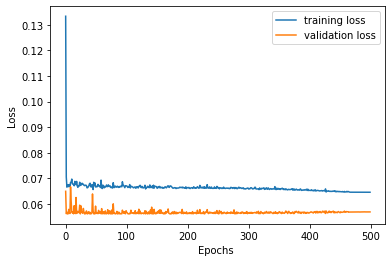

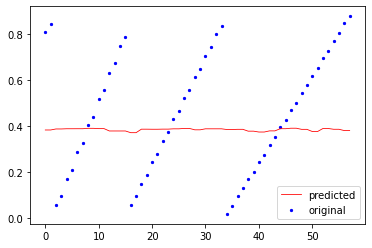

<Figure size 432x288 with 0 Axes>

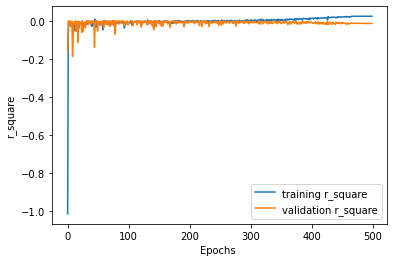

<Figure size 432x288 with 0 Axes>

In [64]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')
plt.figure()
preds=model.predict(x_test)
x_ax = range(len(preds))
plt.scatter(x_ax, normalized_ytest, s=5, color="blue", label="original")
plt.plot(x_ax, preds, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
plt.figure()

plt.plot(range(num),history.history['r_square'],label = 'training r_square')
plt.plot(range(num),history.history['val_r_square'],label = 'validation r_square')
plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('r_square')
plt.figure()

In [72]:
del model

In [73]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
model = Sequential()
model.add(Conv1D(256, 2, activation="relu", input_shape=(20, 1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1,activation="linear"))
metric = tfa.metrics.r_square.RSquare()
model.compile(loss="mse", optimizer="adam",metrics=metric)

In [74]:
history=model.fit(x=x_train, y=y_train, 
	validation_data=(x_val, y_val),callbacks=[lrscheduler],
	epochs=500,batch_size=9)


Epoch 1: LearningRateScheduler setting learning rate to 0.00028100000000000005.
Epoch 1/500
30/30 [==============================] - 1s 16ms/step - loss: 0.1375 - r_square: -1.0783 - val_loss: 0.0613 - val_r_square: -0.0923 - lr: 2.8100e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00028100000000000005.
Epoch 2/500
30/30 [==============================] - 0s 8ms/step - loss: 0.0697 - r_square: -0.0537 - val_loss: 0.0566 - val_r_square: -0.0088 - lr: 2.8100e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00028100000000000005.
Epoch 3/500
30/30 [==============================] - 0s 10ms/step - loss: 0.0667 - r_square: -0.0080 - val_loss: 0.0573 - val_r_square: -0.0212 - lr: 2.8100e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00028100000000000005.
Epoch 4/500
30/30 [==============================] - 0s 9ms/step - loss: 0.0677 - r_square: -0.0225 - val_loss: 0.0567 - val_r_square: -0.0109 - lr: 2.8100e-04

Epoch 5: LearningRateScheduler se

9/9 [==============================] - 0s 4ms/step - loss: 0.0661 - r_square: 6.3097e-04
[0.06612320989370346, 0.0006309747695922852]
MSE: 0.0659


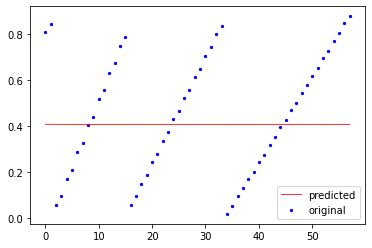

In [75]:
ypred = model.predict(x_test)

print(model.evaluate(x_train,normalized_y))

print("MSE: %.4f" % mean_squared_error(normalized_ytest, ypred))


x_ax = range(len(ypred))
plt.scatter(x_ax, normalized_ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


2/2 [==============================] - 0s 7ms/step


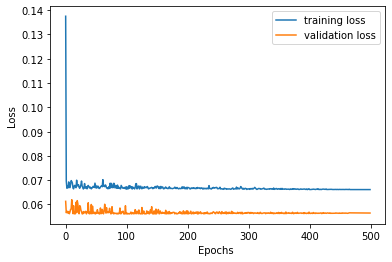

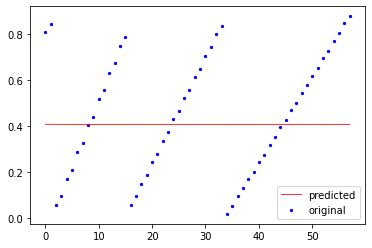

<Figure size 432x288 with 0 Axes>

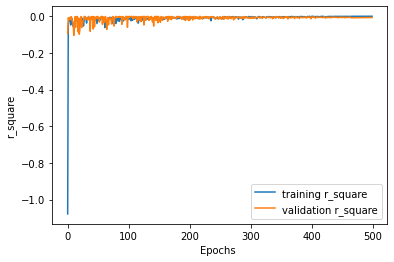

<Figure size 432x288 with 0 Axes>

In [76]:
num=len(history.history['loss'])

plt.plot(range(num),history.history['loss'],label = 'training loss')
plt.plot(range(num),history.history['val_loss'],label = 'validation loss')

plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('Loss')
plt.figure()
preds=model.predict(x_test)
x_ax = range(len(preds))
plt.scatter(x_ax, normalized_ytest, s=5, color="blue", label="original")
plt.plot(x_ax, preds, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
plt.figure()

plt.plot(range(num),history.history['r_square'],label = 'training r_square')
plt.plot(range(num),history.history['val_r_square'],label = 'validation r_square')
plt.legend()

plt.xlabel("Epochs ")
plt.ylabel('r_square')
plt.figure()

In [82]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(normalized_ytest, preds), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(normalized_ytest, preds), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(normalized_ytest, preds), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(normalized_ytest, preds), 2)) 
print("R2 score =", round(sm.r2_score(normalized_ytest, preds), 2))

Mean absolute error = 0.22
Mean squared error = 0.07
Median absolute error = 0.22
Explain variance score = 0.0
R2 score = -0.03
